No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


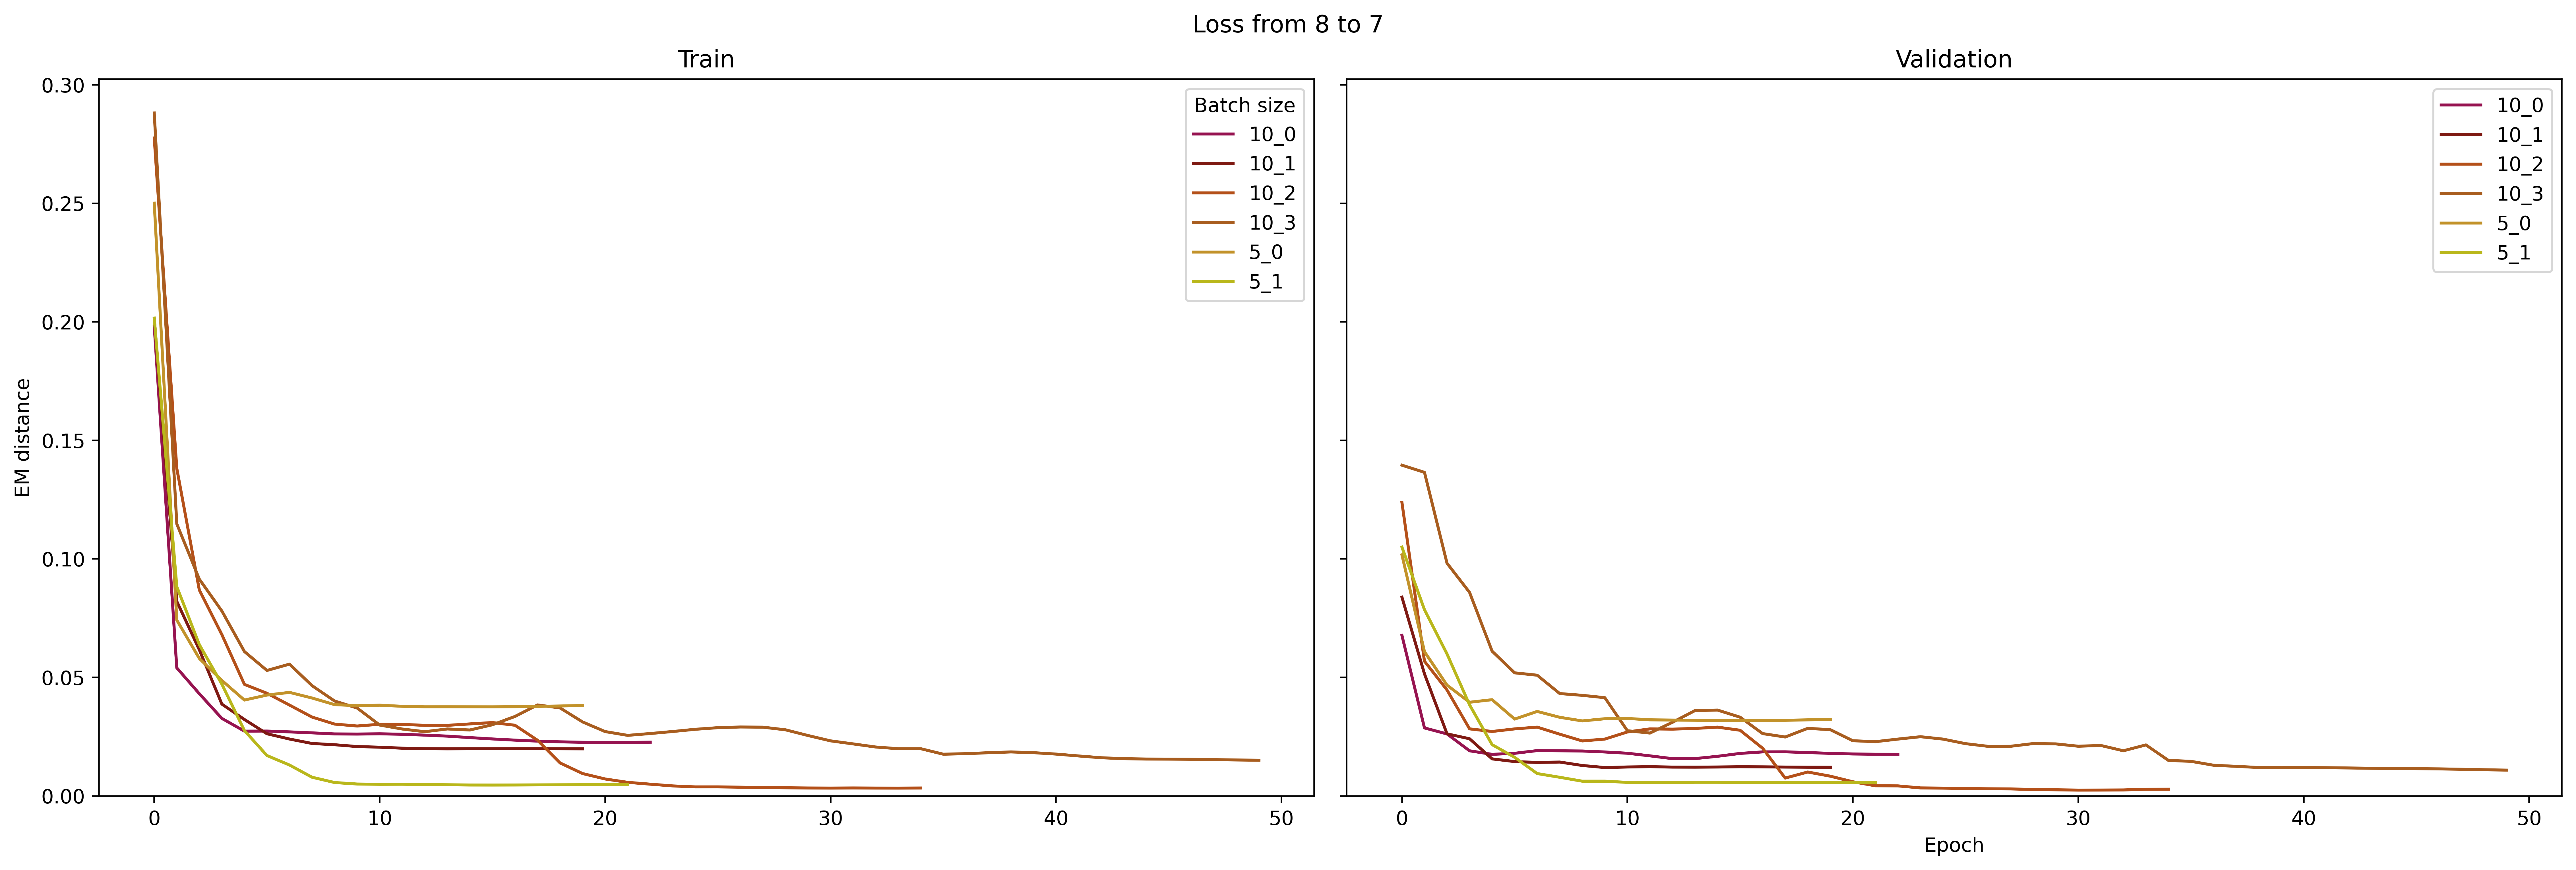

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


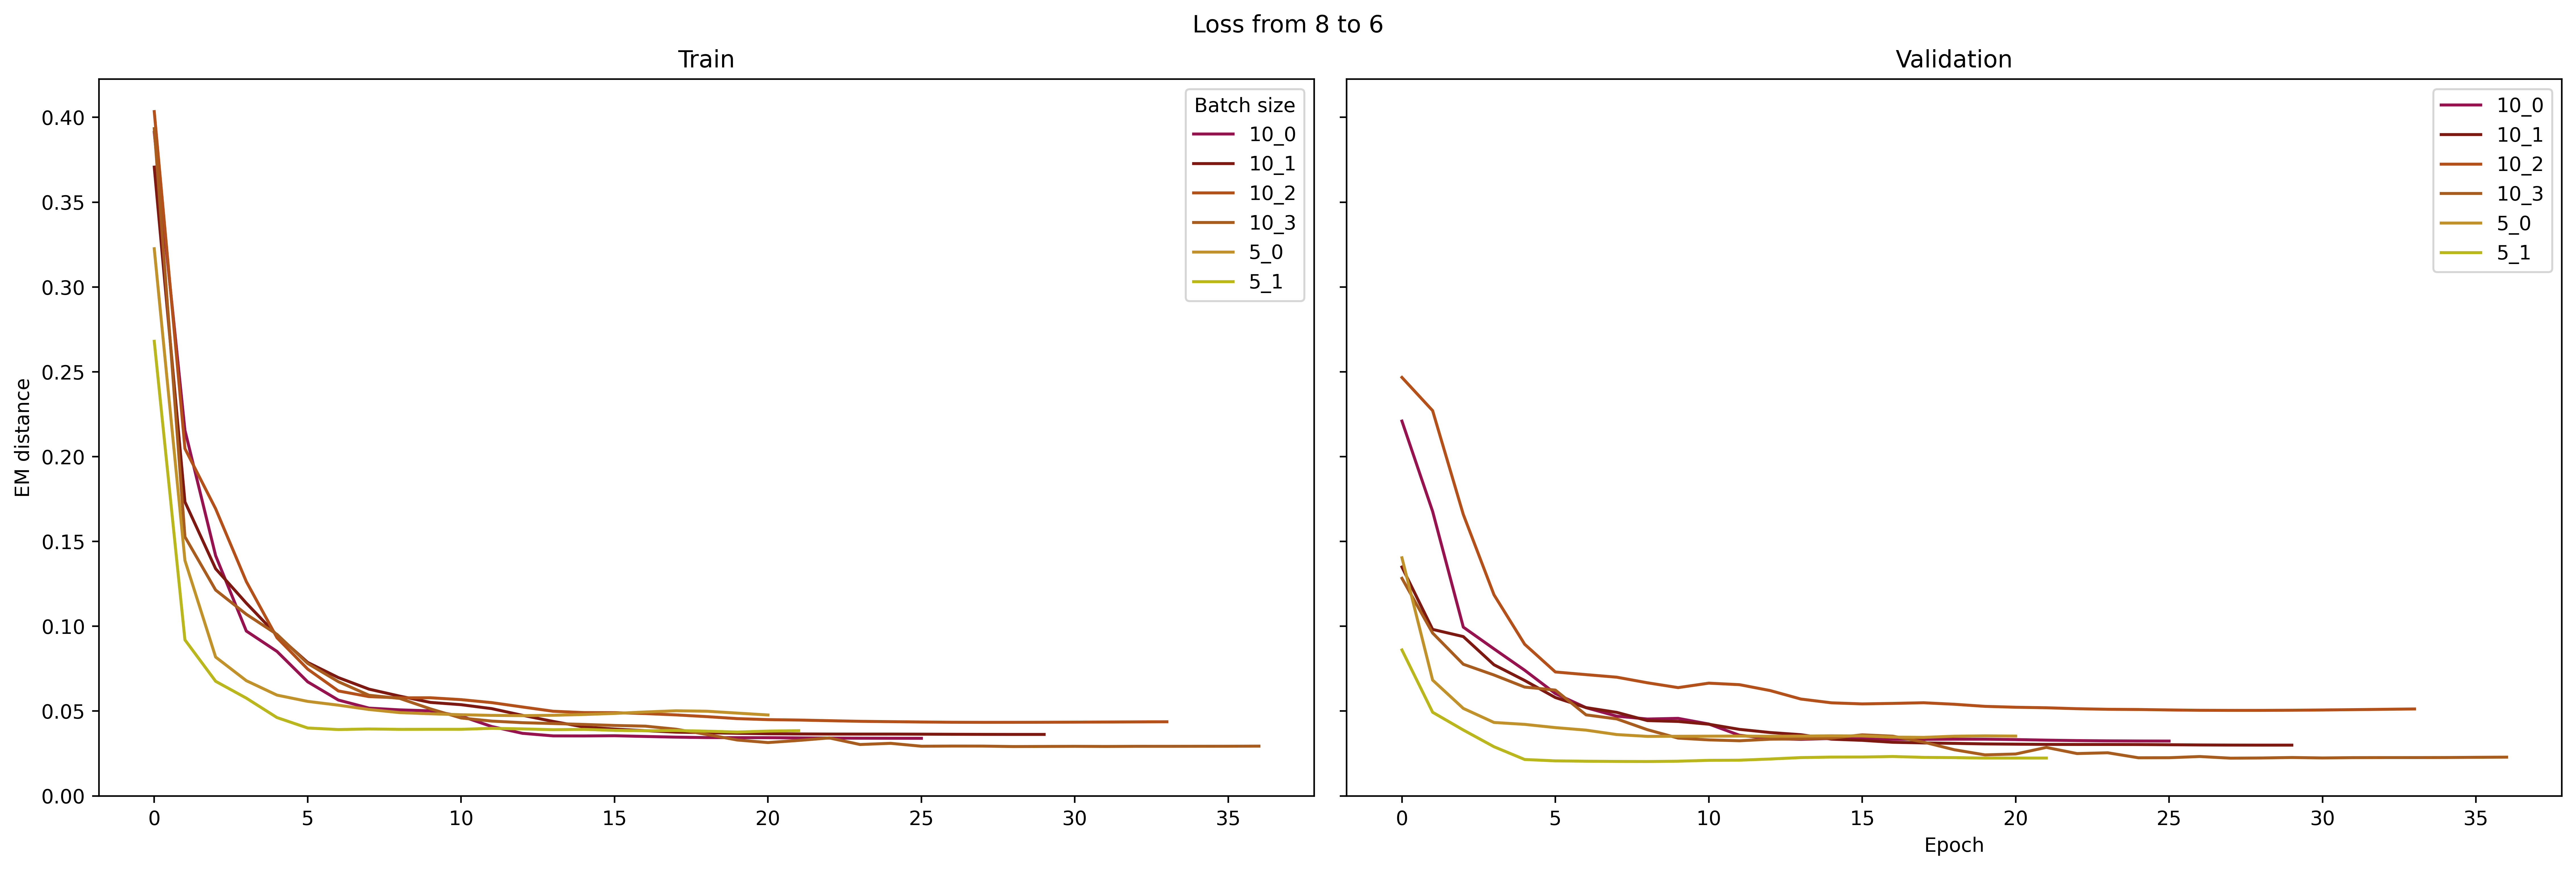

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


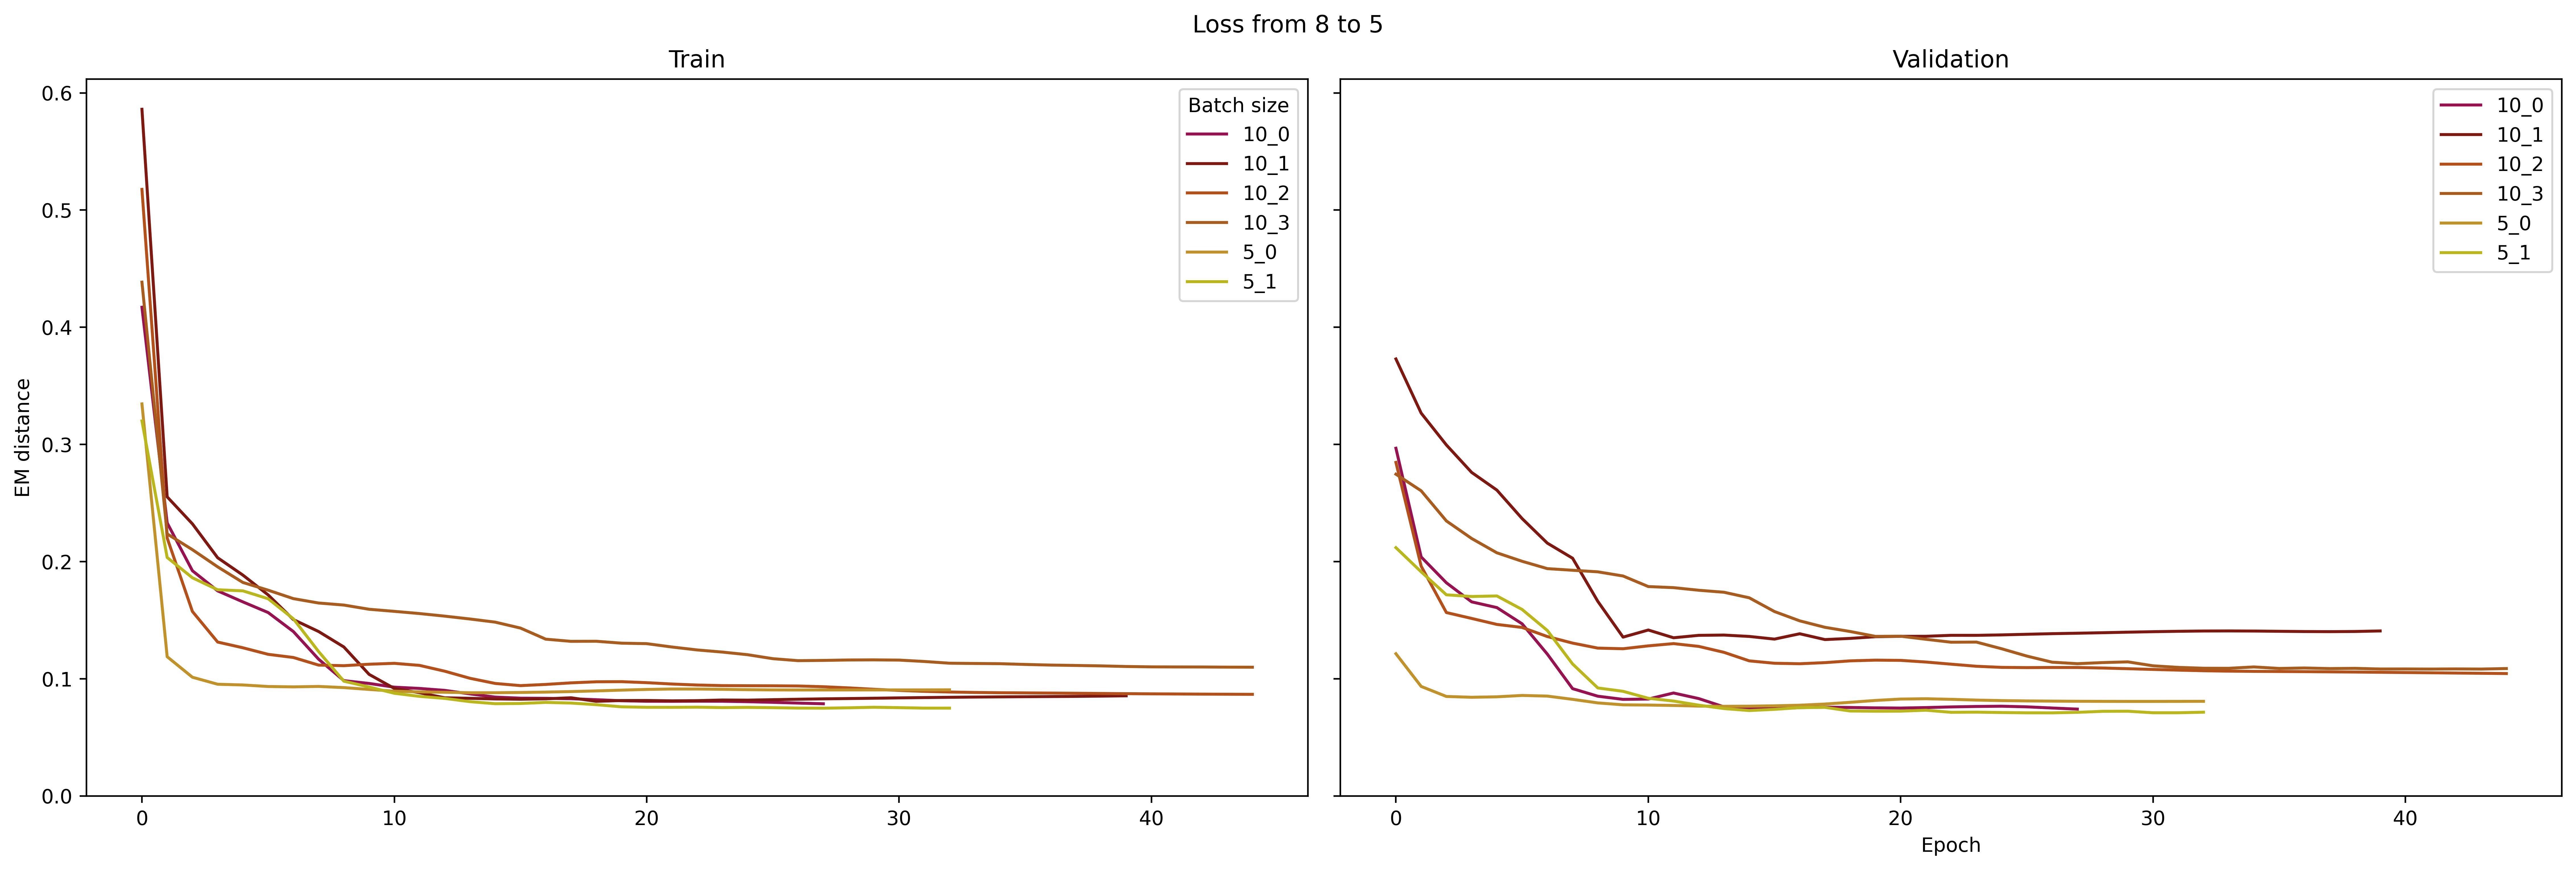

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


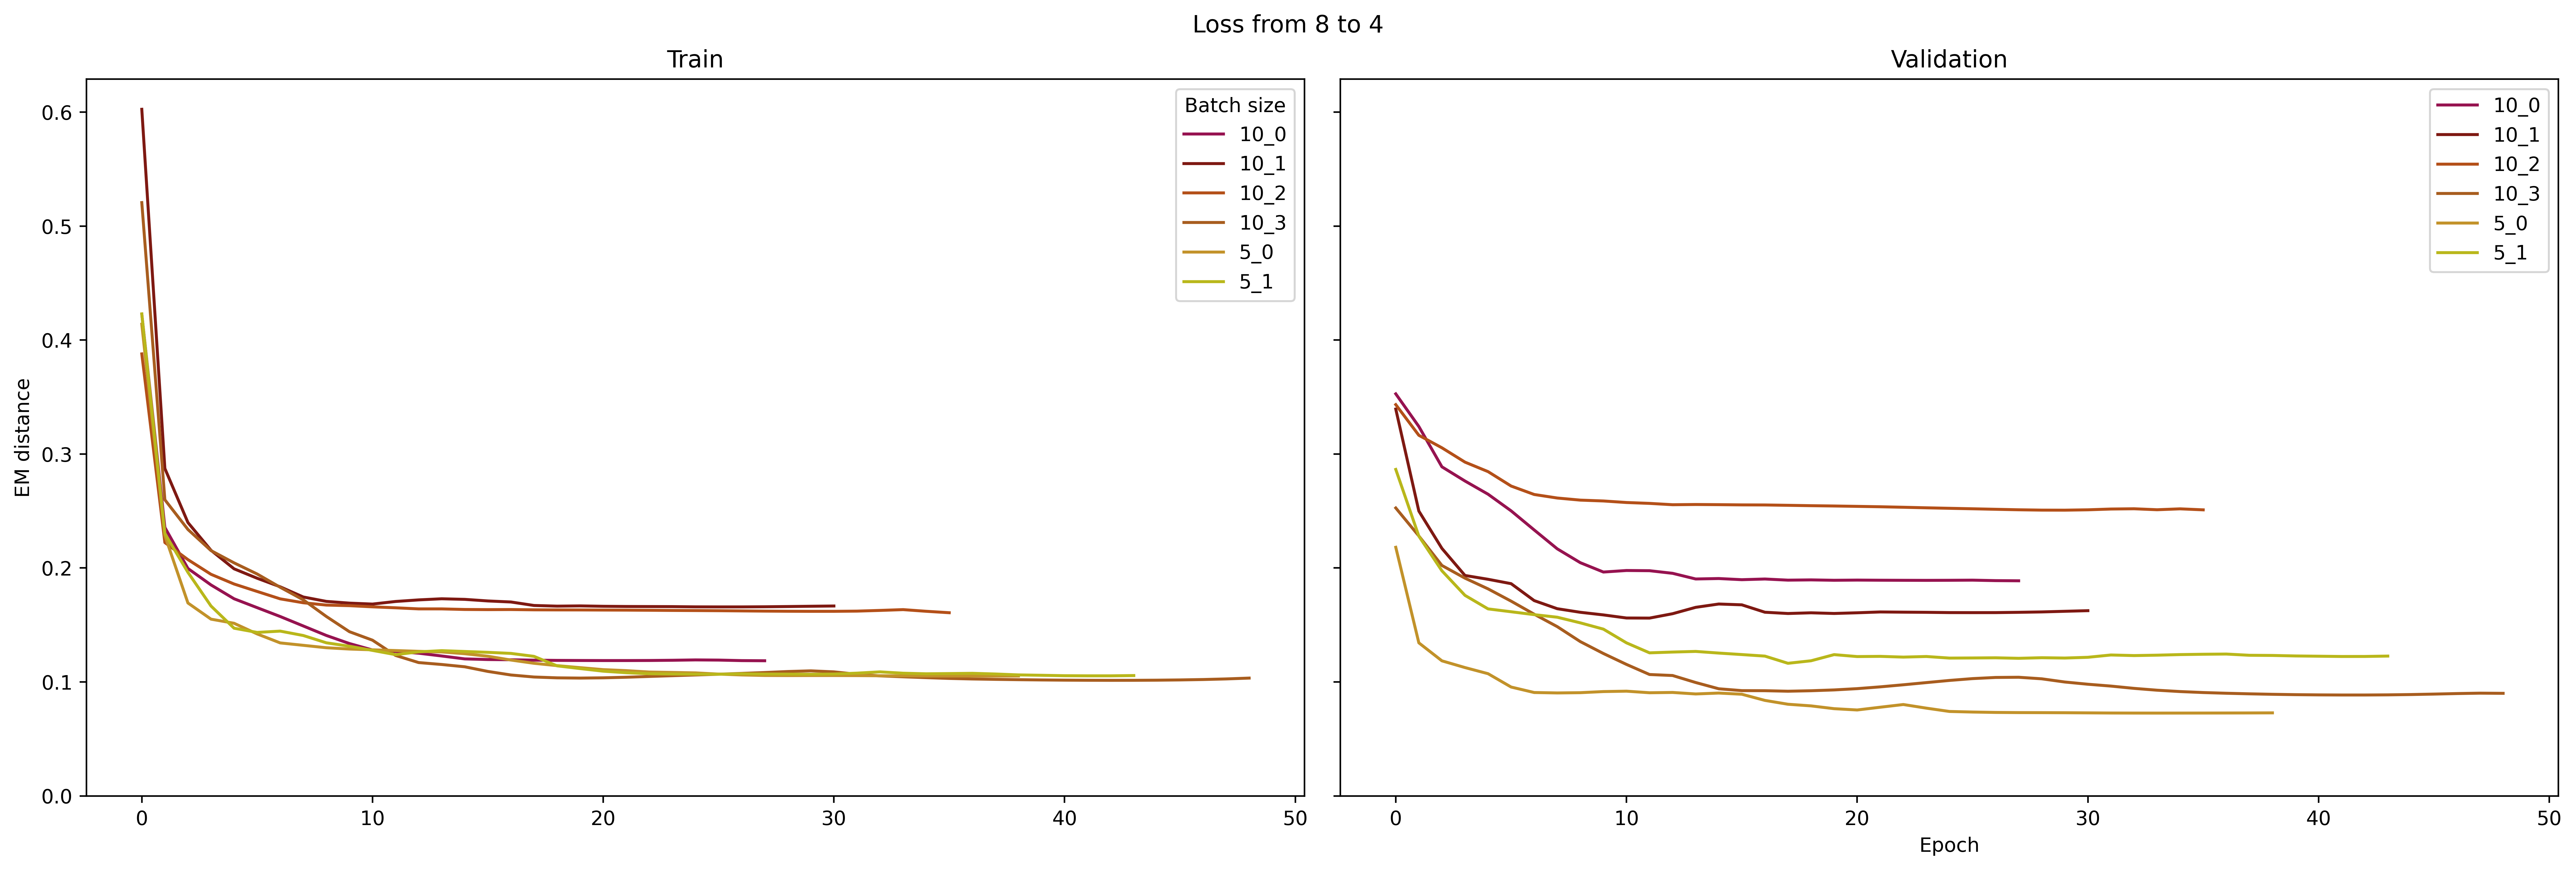

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


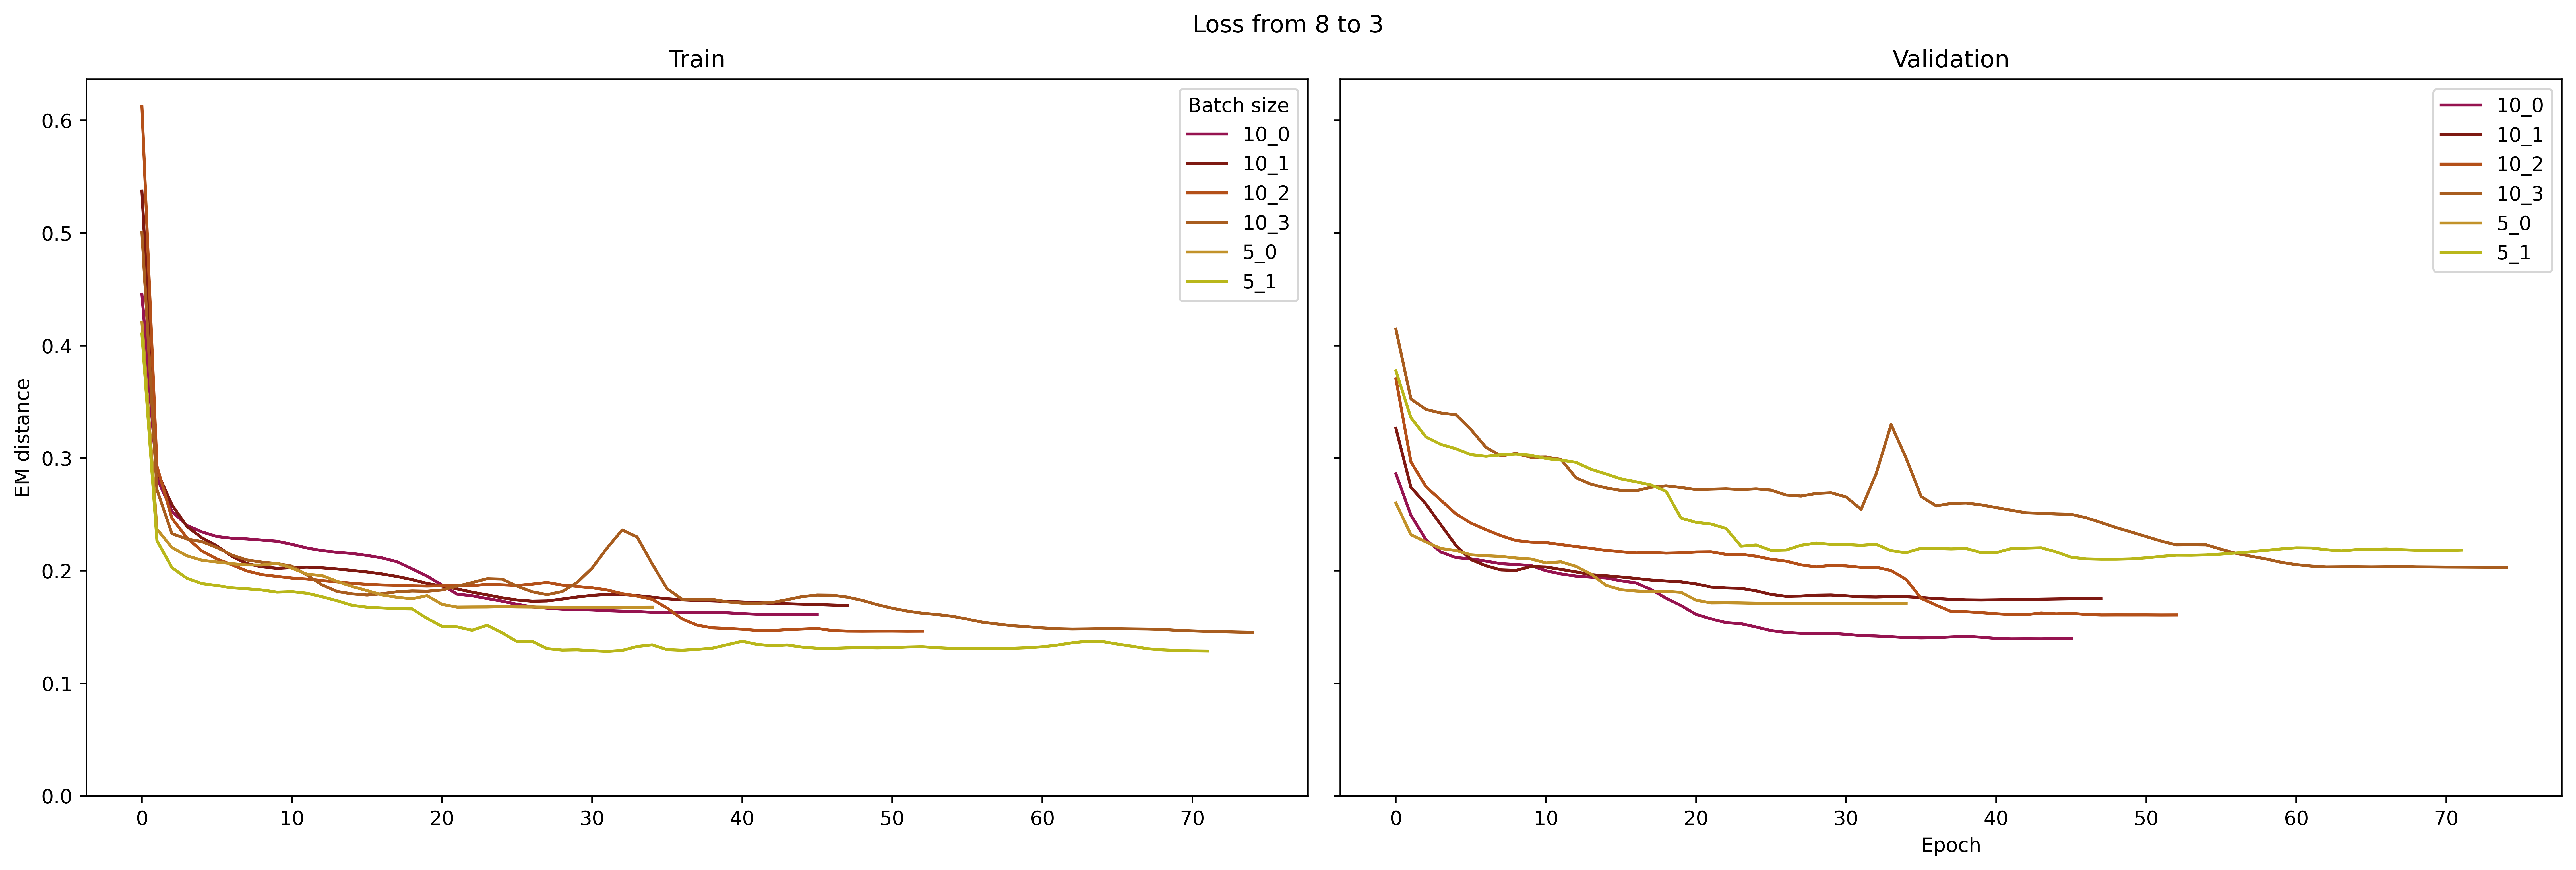

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


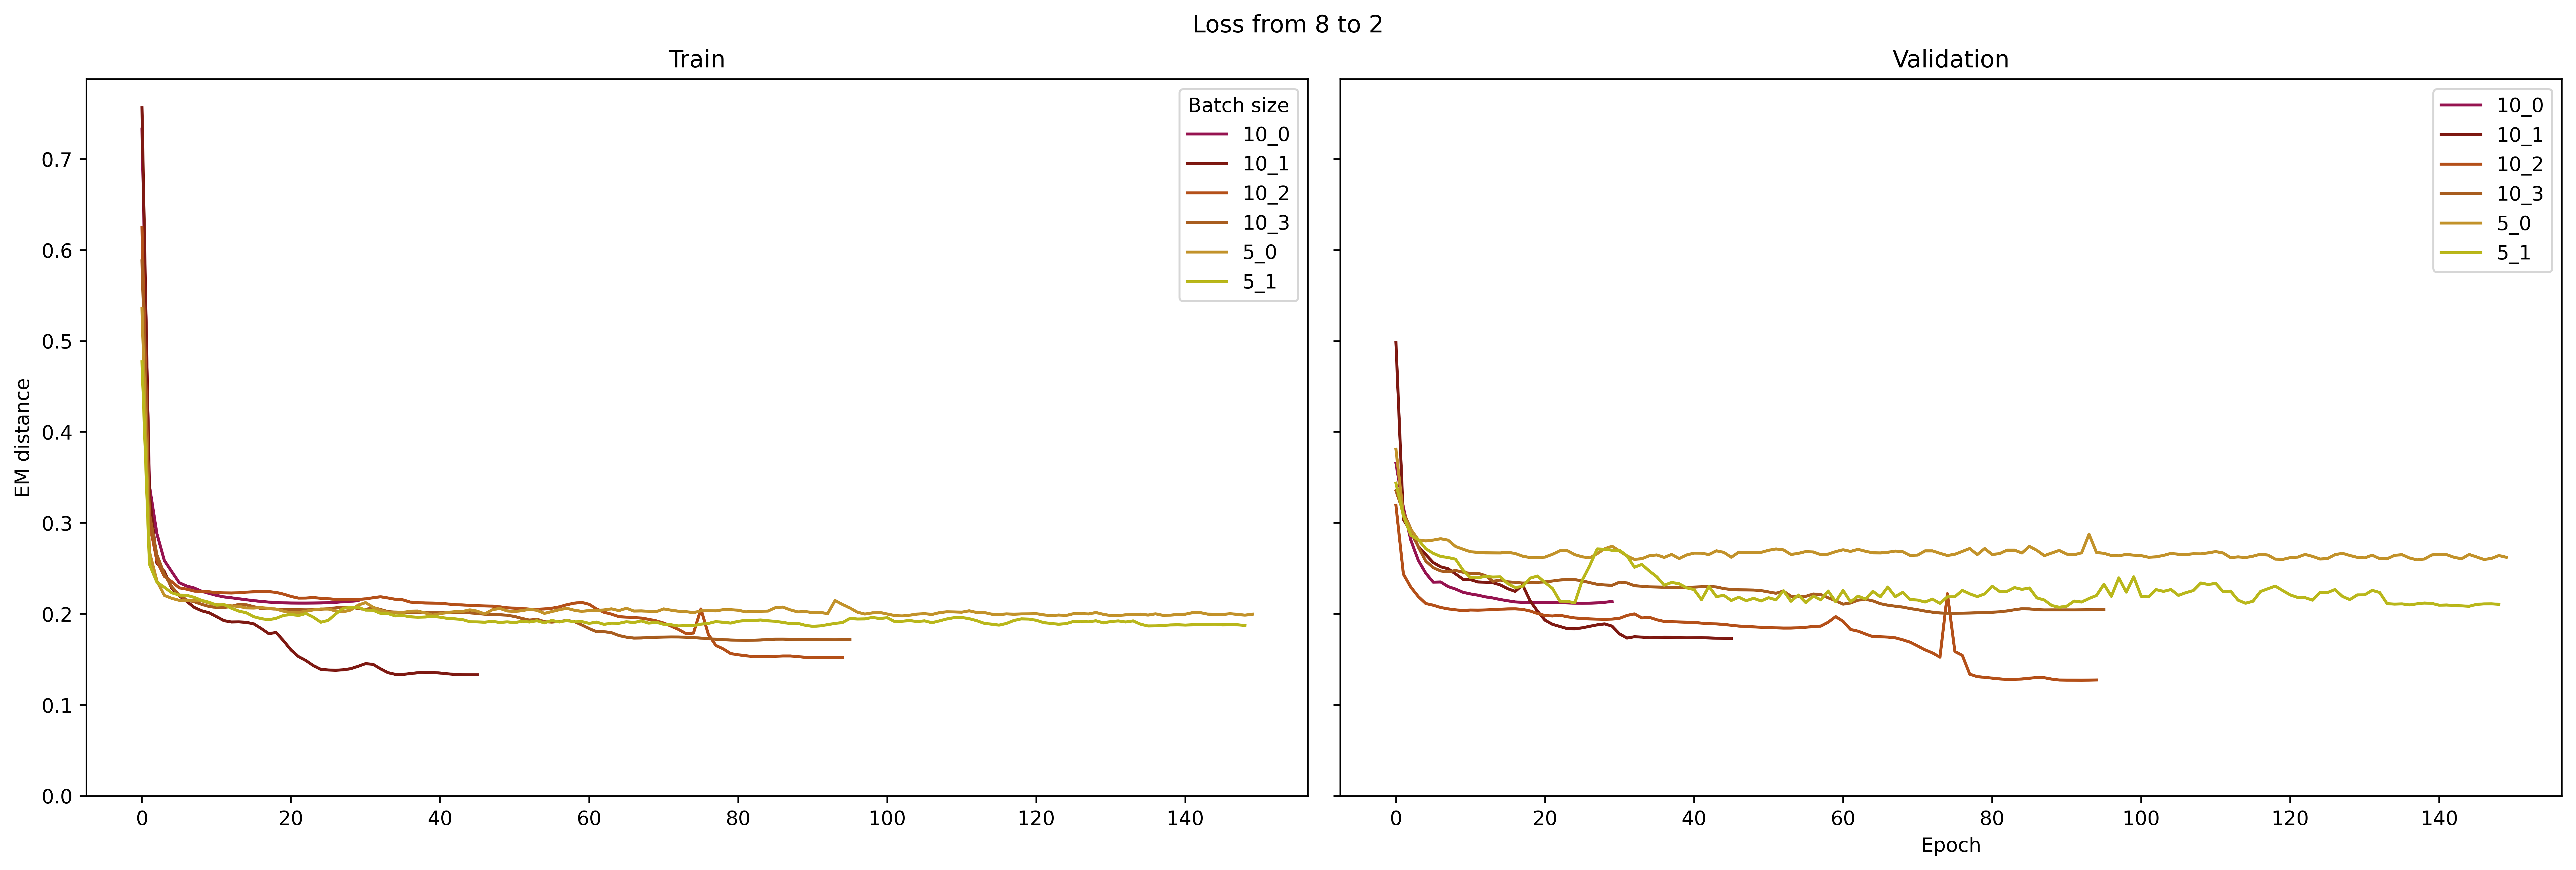

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


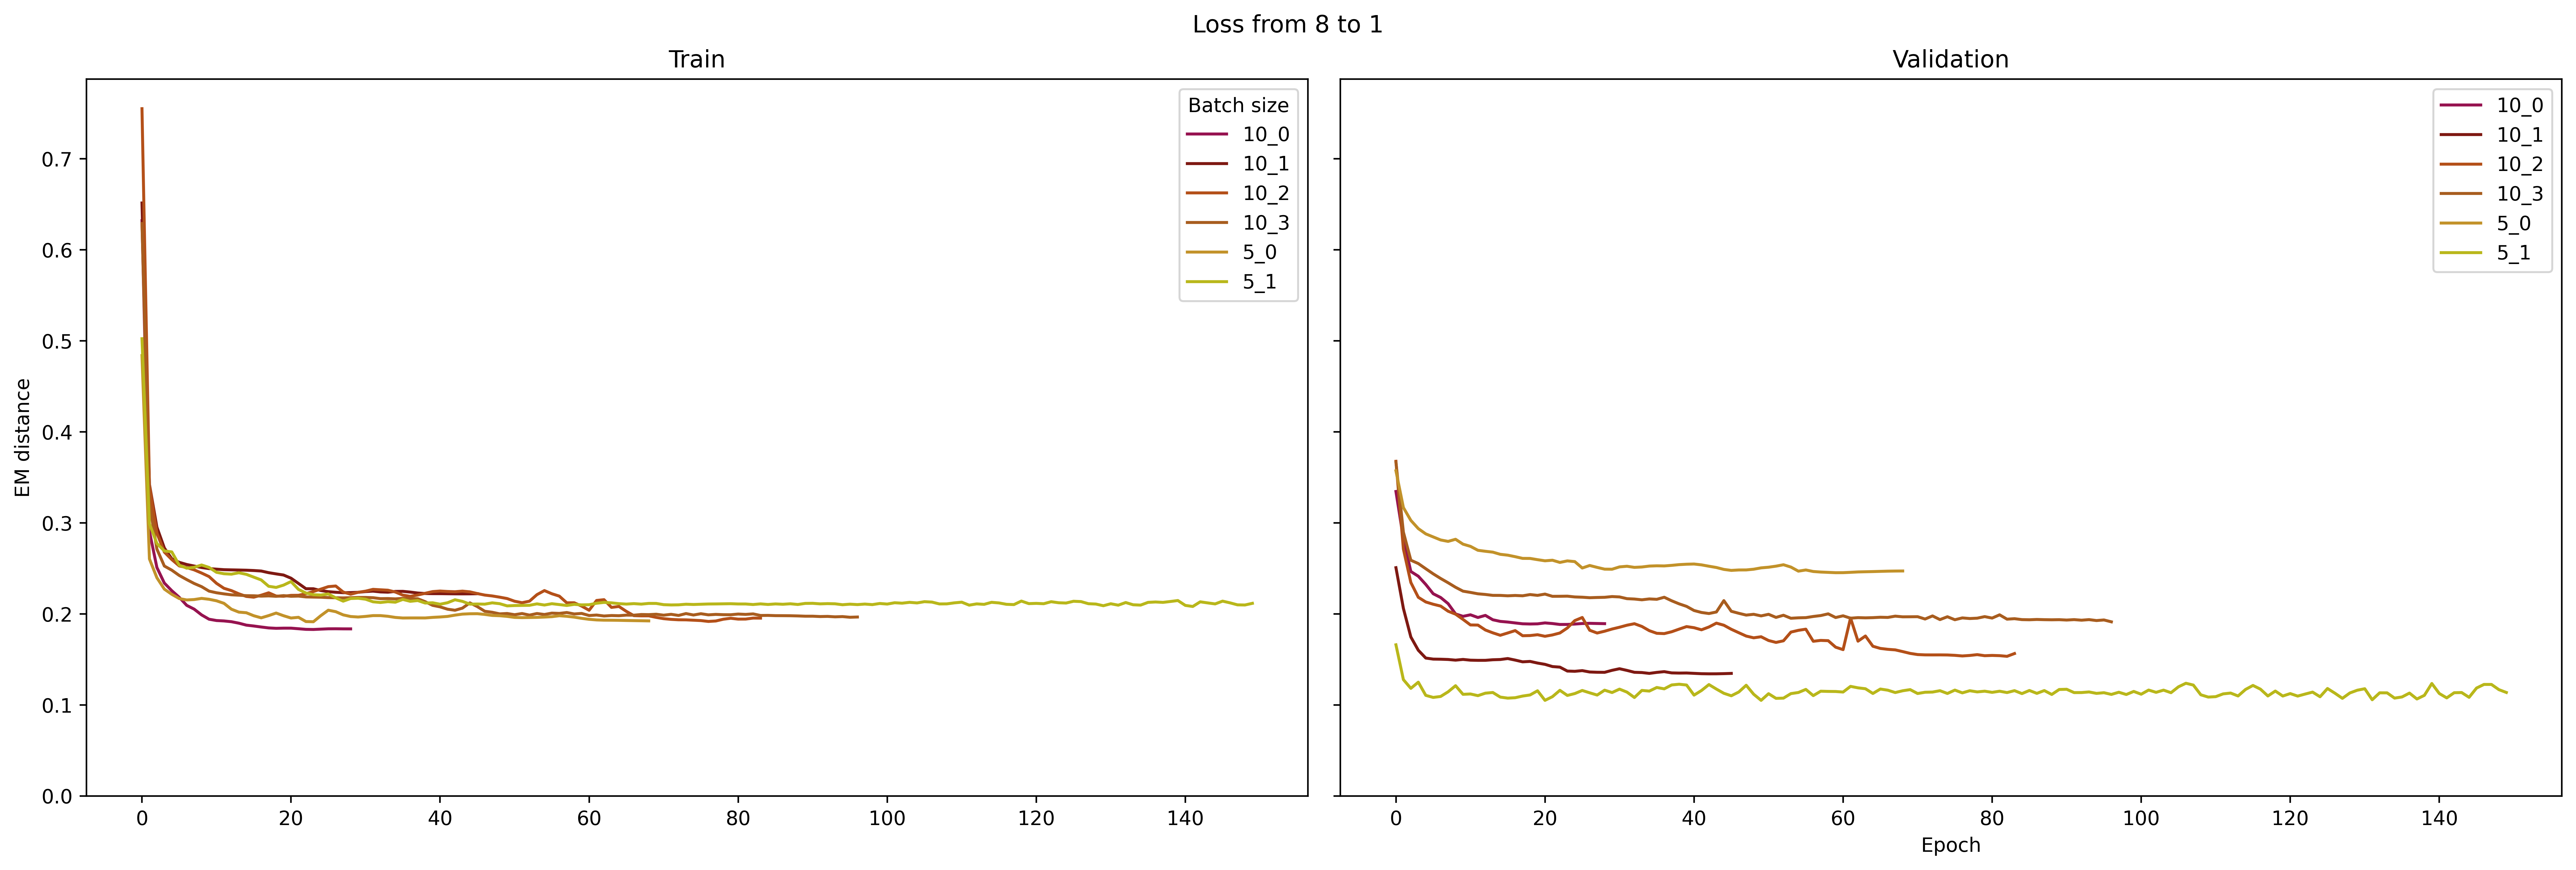

In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Define the main folder
main_folder = 'out'
# Initialize data storage
columns = ["Train", "Validation"]  # Titles for each column
plot_data = {}
i =1
custom_palette =[
    # '#C24AA2','#D6518F',
    "#961350","#7E1912","#B45019","#A85D1F","#C2922A","#B9B71B"]
sns.set_palette(custom_palette)  




for subfolder in os.listdir(main_folder):
    train_data_all = {} 
    val_data_all = {}
    subfolder_path = os.path.join(main_folder, subfolder)
    for batchfolder in os.listdir(subfolder_path):
        batchfolder_path = os.path.join(subfolder_path, batchfolder)
        for file in os.listdir(batchfolder_path):
            file_path= os.path.join(batchfolder_path, file)
            if 'loss_train' in file:
                mq_ver=file[15]
                mq = mq_ver
                append=file[11:]
                train_file = os.path.join(batchfolder_path, file)
                val_file = os.path.join(batchfolder_path, f'loss_val{append}')
                #load losses
                train_data = np.load(train_file)
                val_data = np.load(val_file)
                
                # Collect data
                train_data_all[(mq,batchfolder,append[-5])]=(train_data)
                val_data_all[(mq,batchfolder,append[-5])]=(val_data)
    if train_data_all:

        fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(18,6),sharey=True,dpi=500)
        fig.suptitle(f'Loss from 8 to {mq}')
        axs[0].set_ylabel("EM distance")
        for k,tr in train_data_all.items():
            x=range(min(len(tr),250))
            sns.lineplot(x=x,y=tr[:min(len(tr),250)], ax=axs[0],label=k[1]+'_'+k[2]);
            axs[0].set_title('Train')
            l=axs[0].legend()
            l.set_title('Batch size')
        for k,vr in val_data_all.items():
            x=range(min(len(vr),250))
            l=axs[1].legend()
            l.set_title('Batch size')
            sns.lineplot(x=x,y=vr[:min(len(vr),250)], ax=axs[1],label=k[1]+'_'+k[2]);
            axs[1].set_title('Validation')
            plt.xlabel("Epoch")
        axs[0].set_ylim(bottom = 0)

        plt.show()



In [2]:
for k,tr in train_data_all.items():
    print (k)


('1', '10', '0')
('1', '10', '1')
('1', '10', '2')
('1', '10', '3')
('1', '5', '0')
('1', '5', '1')
